In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)

df.shape

(1797, 2)

In [3]:
y = load_digits().target #target

In [4]:
#Initialize the class object
kmeans = KMeans(n_clusters= 10) #no of clusters = 10 (0-9)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[7 9 4 ... 4 3 5]


In [5]:
sm.adjusted_rand_score(y,label)

0.9081243473098569


In [6]:
sm.confusion_matrix(label, y)

array([[ 15,   0,   0,   0,  16,   5, 145,   0,   0,   1],
       [  0,   0, 111,  44,   0,   4,   0,   0,   3,   8],
       [  0,   8,  14,  13,   3,  28,   0, 117,  29,   9],
       [  4,   6,   4,  21,   0,  47,   0,   0,   8,  94],
       [  0,  51,  10,   0,   8,  45,   2,  41,  56,  10],
       [  1,  29,  36,  11,   0,  45,   0,   1,  73,  17],
       [  1,   1,   0,   0, 150,   2,  27,   0,   1,   0],
       [157,   0,   0,   0,   0,   6,   7,   0,   0,   0],
       [  0,   0,   2,  94,   0,   0,   0,   0,   0,  41],
       [  0,  87,   0,   0,   4,   0,   0,  20,   4,   0]], dtype=int64)

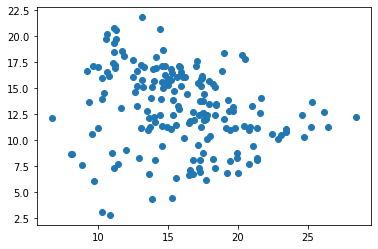

In [7]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

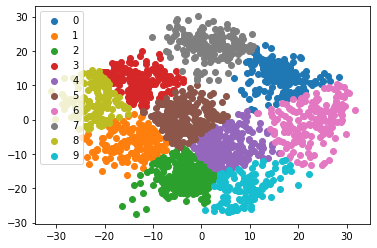

In [8]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

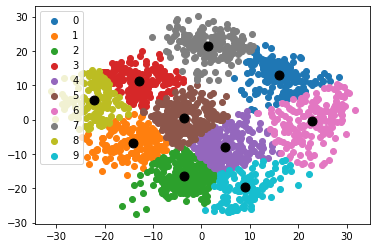

In [9]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()